In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
airline_df = pd.read_csv('./Data/airline_data.csv')

In [4]:
airline_df.dropna(inplace = True)
airline_df.reset_index(drop=True, inplace=True)
airline_df = pd.get_dummies(airline_df, prefix = None, prefix_sep = '_', dummy_na = False, columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class','satisfaction'], sparse = False, drop_first = False, dtype = None)

In [5]:
airline_df.columns
columns_drop = ['id', 'Unnamed: 0.1', 'Unnamed: 0','satisfaction_neutral or dissatisfied', 'Gender_Female','Customer Type_disloyal Customer', 'Type of Travel_Business travel']
airline_df.drop(columns_drop, axis=1, inplace = True)

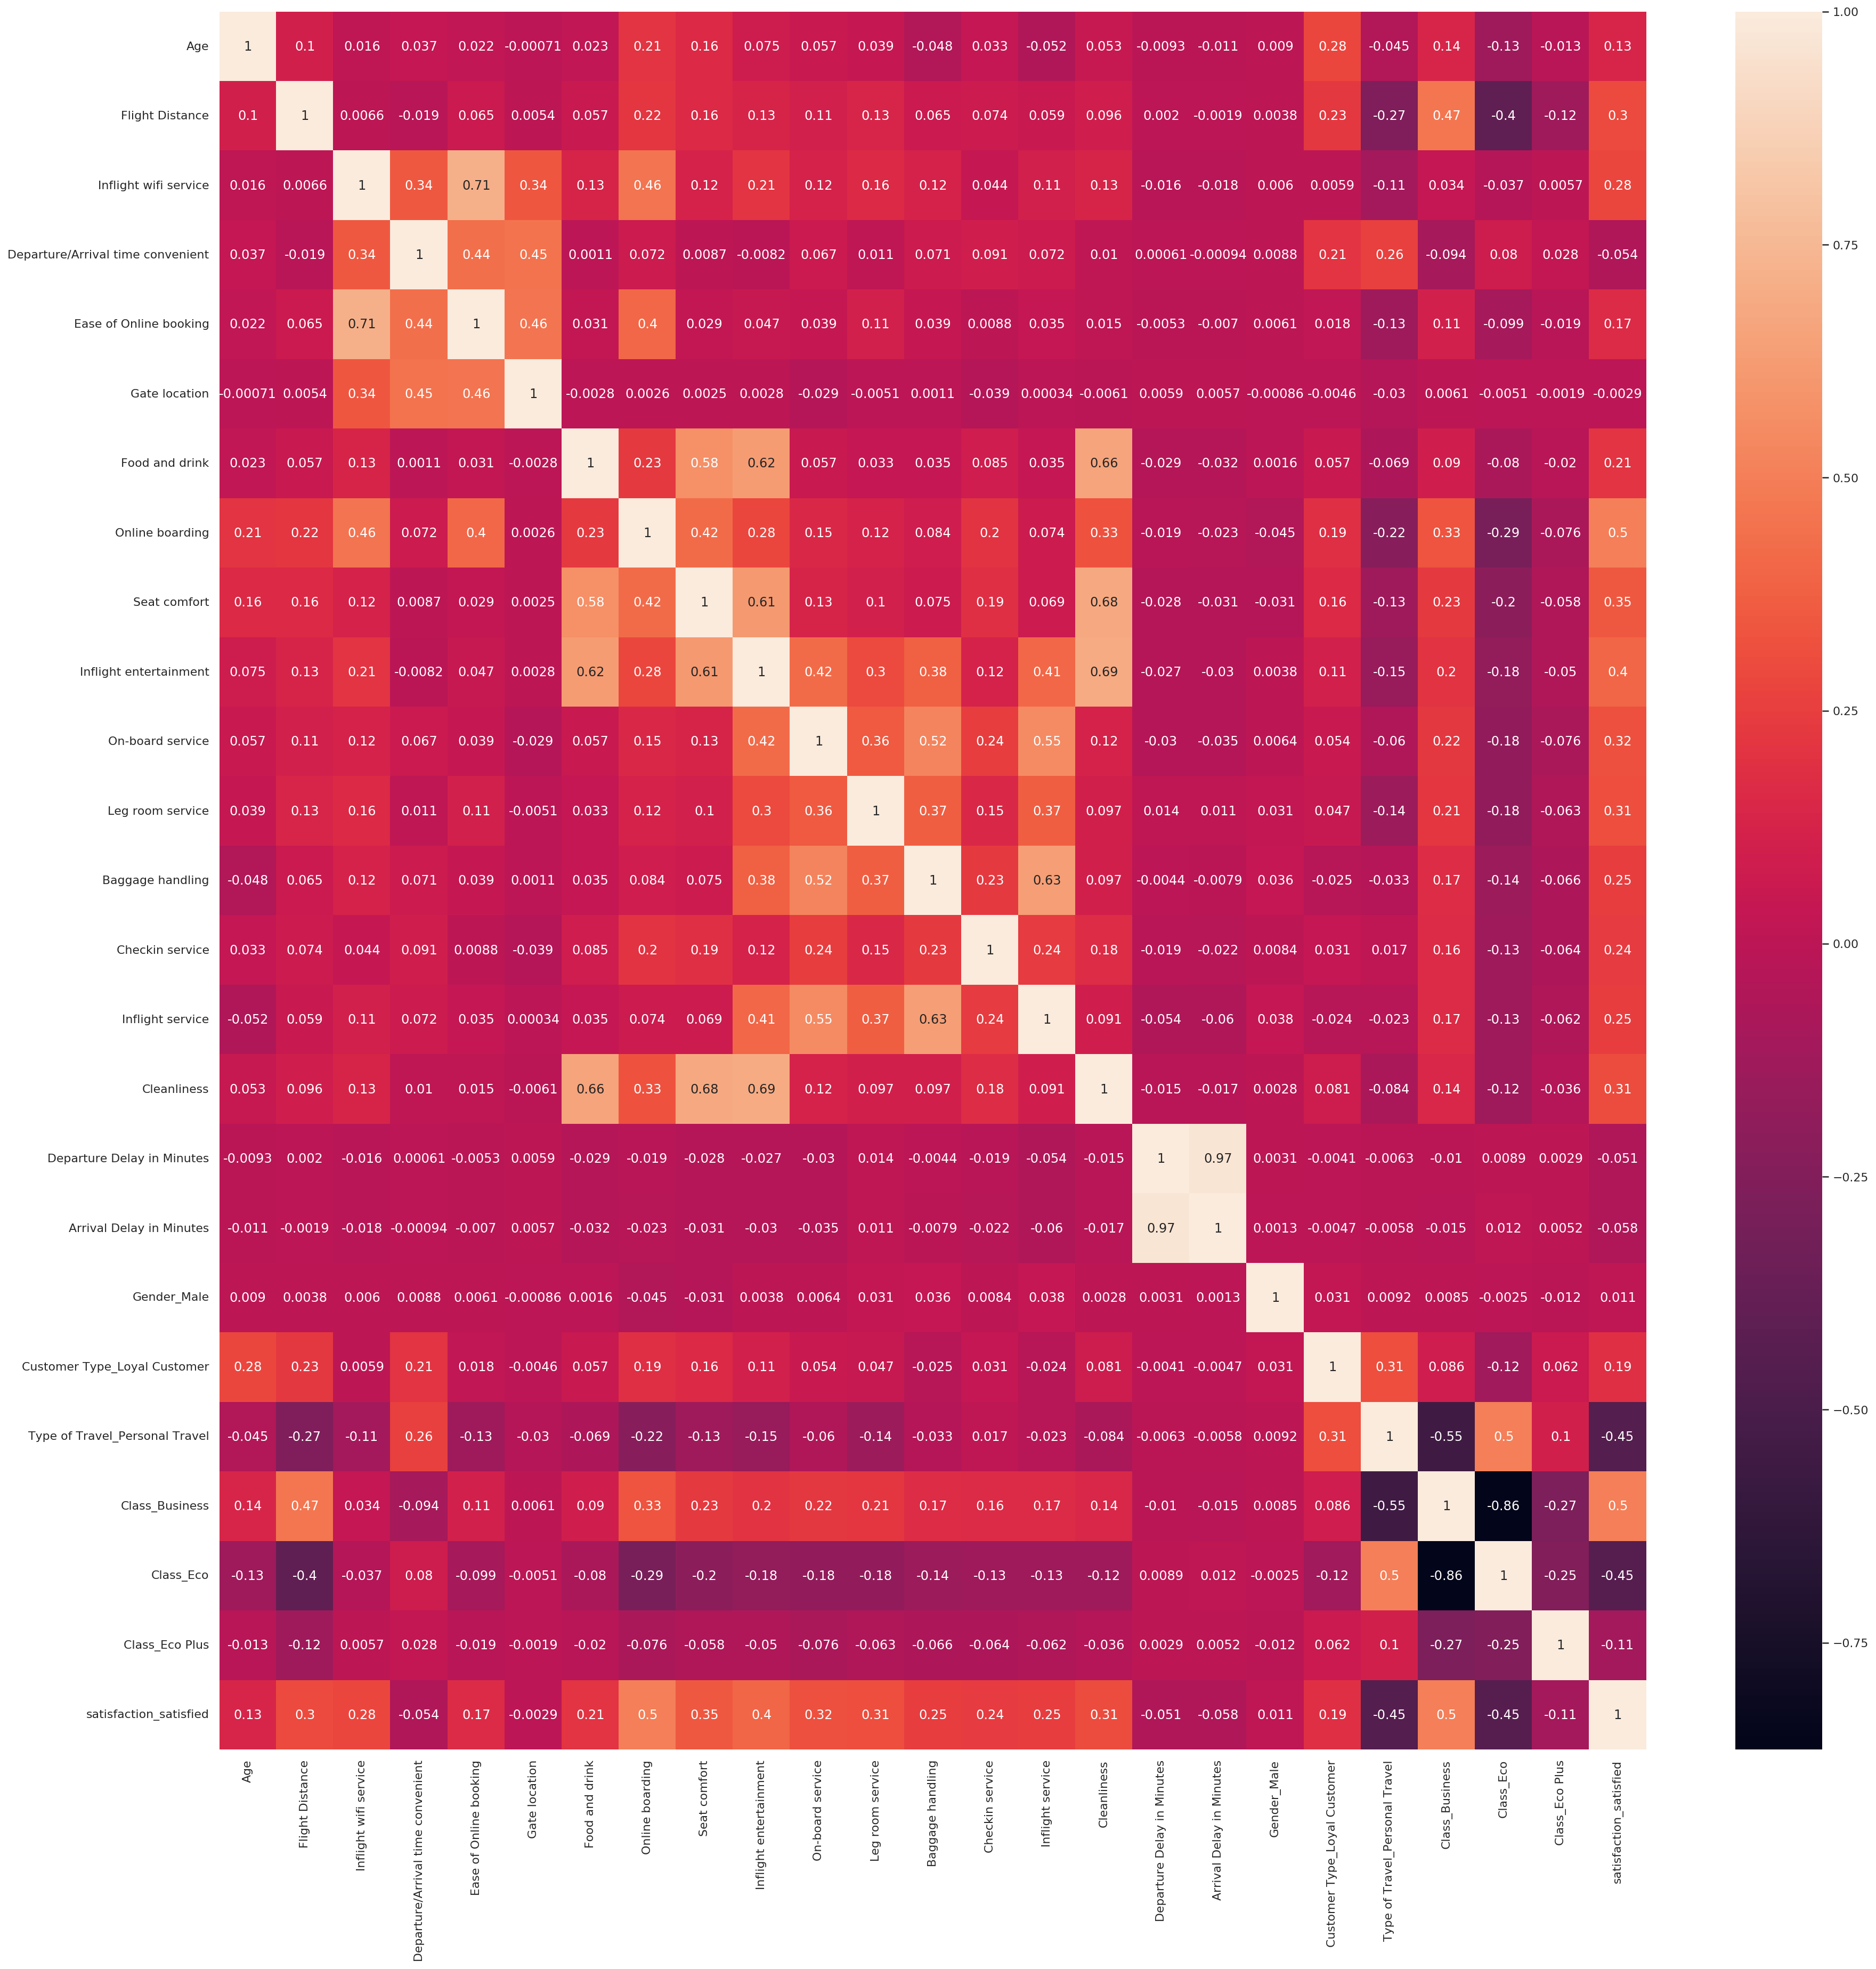

In [5]:
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(airline_df.corr(), annot=True)

In [6]:
target = airline_df["satisfaction_satisfied"]
input_columns = airline_df.loc[:, airline_df.columns != "satisfaction_satisfied"]
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, train_size=0.8)

R:  0.9130980111091203
P:  0.9241929633659776
A:  0.9302648853193297
F:  0.9186119873817035


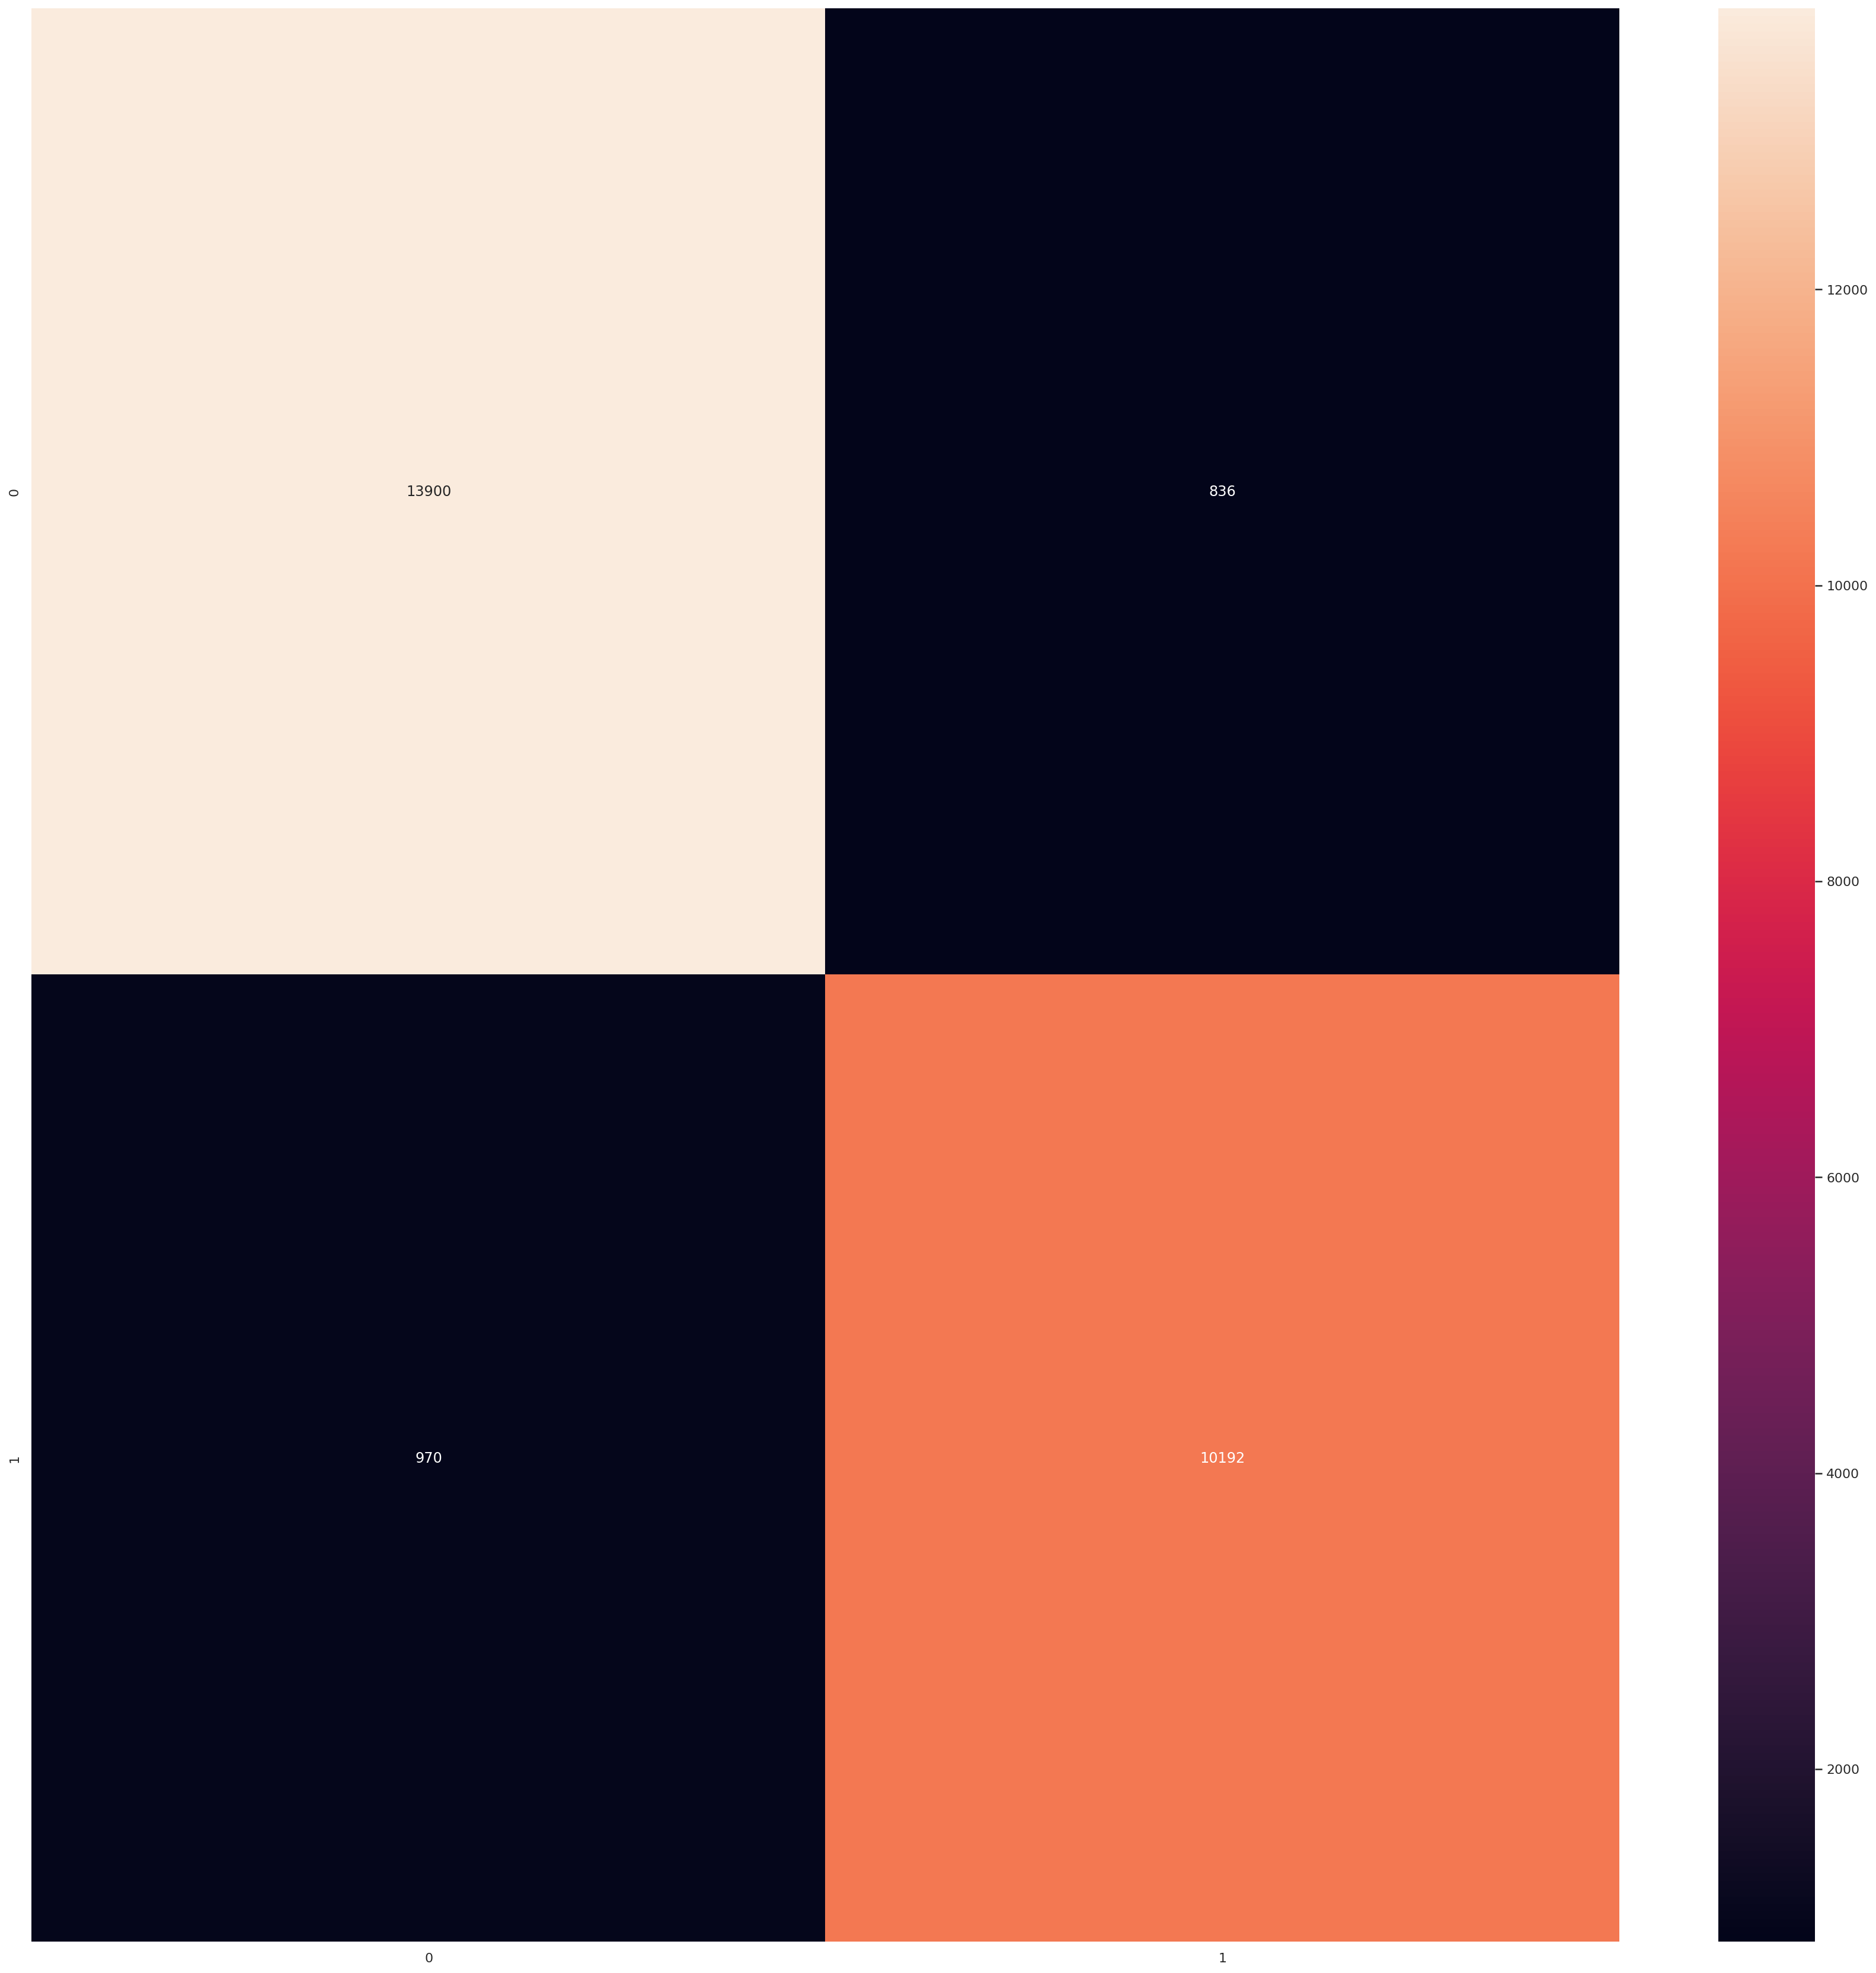

In [7]:
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier(n_estimators=100)

Ada_model.fit(x_train, y_train)

Ada_hat = Ada_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, Ada_hat)
precision = sklearn.metrics.precision_score(y_test, Ada_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, Ada_hat)
f_measure = sklearn.metrics.f1_score(y_test, Ada_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, Ada_hat), annot=True, fmt='g')

R:  0.6534671205877083
P:  0.7358014728134773
A:  0.7495173372461194
F:  0.6921945432977462


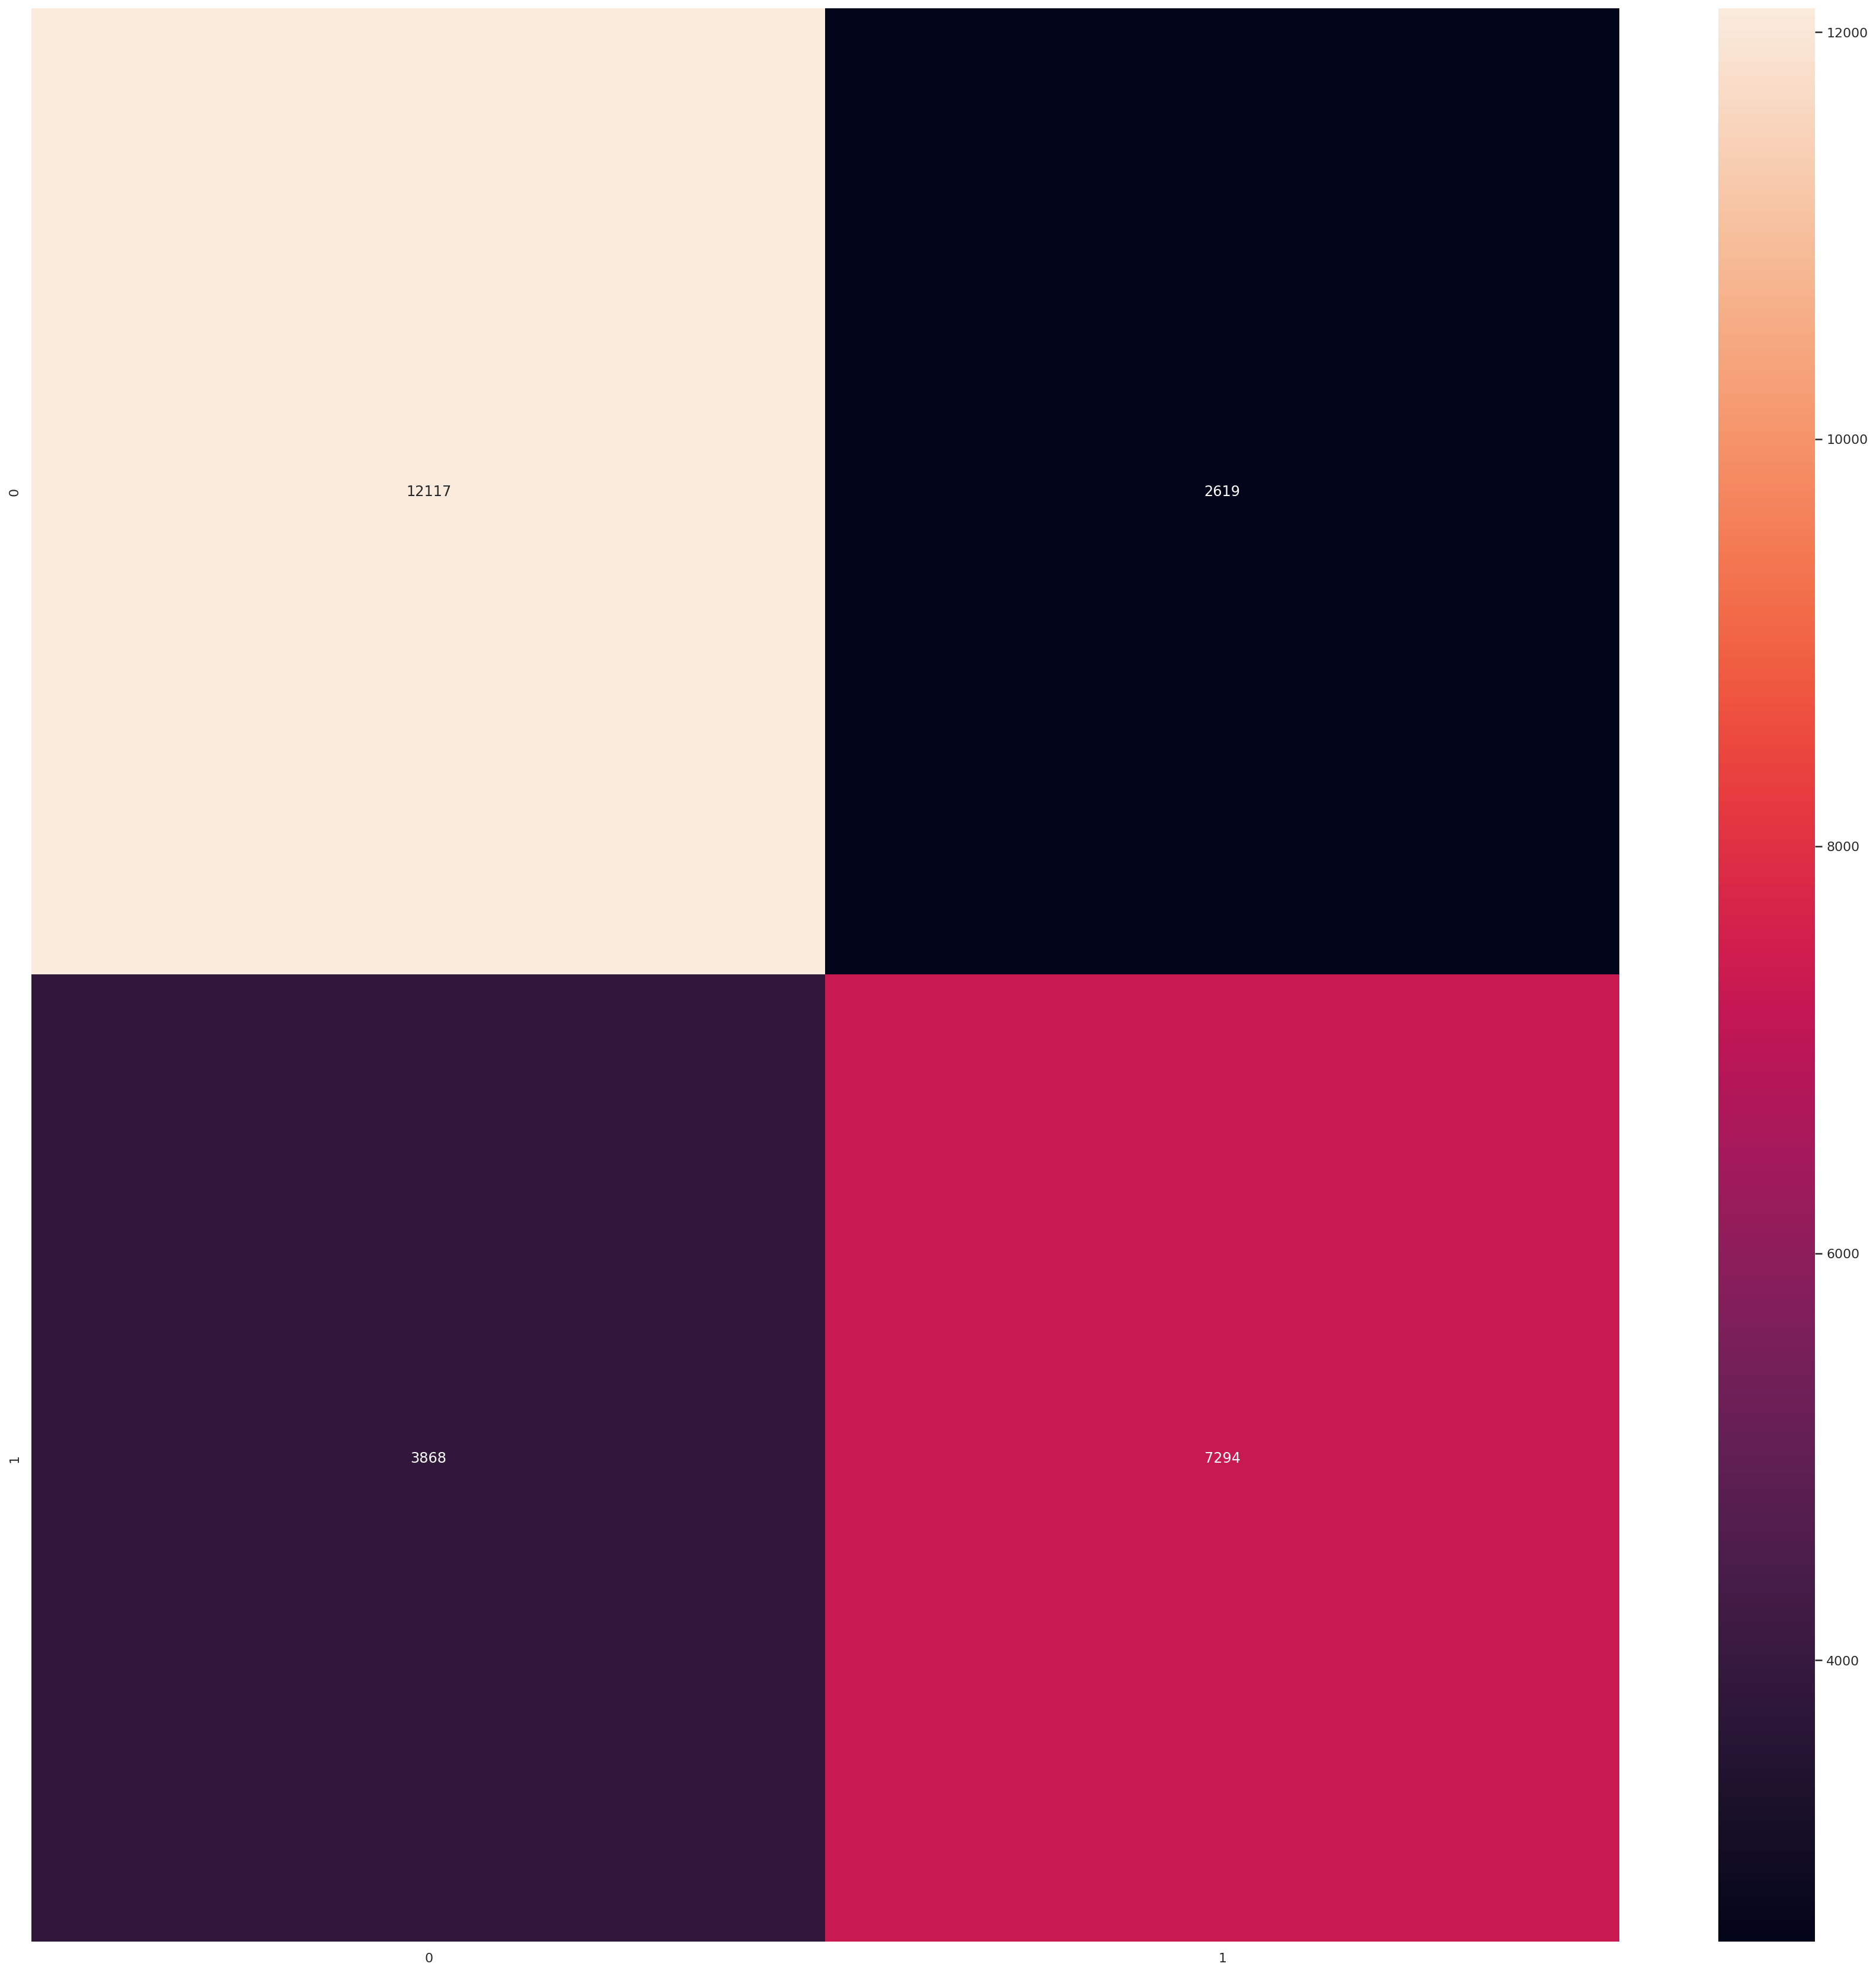

In [9]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=15)

KNN_model.fit(x_train, y_train)

KNN_hat = KNN_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, KNN_hat)
precision = sklearn.metrics.precision_score(y_test, KNN_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, KNN_hat)
f_measure = sklearn.metrics.f1_score(y_test, KNN_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, KNN_hat), annot=True, fmt='g')

R:  0.8772227682959521
P:  0.7032234957020057
A:  0.7869719669472546
F:  0.780644904775158


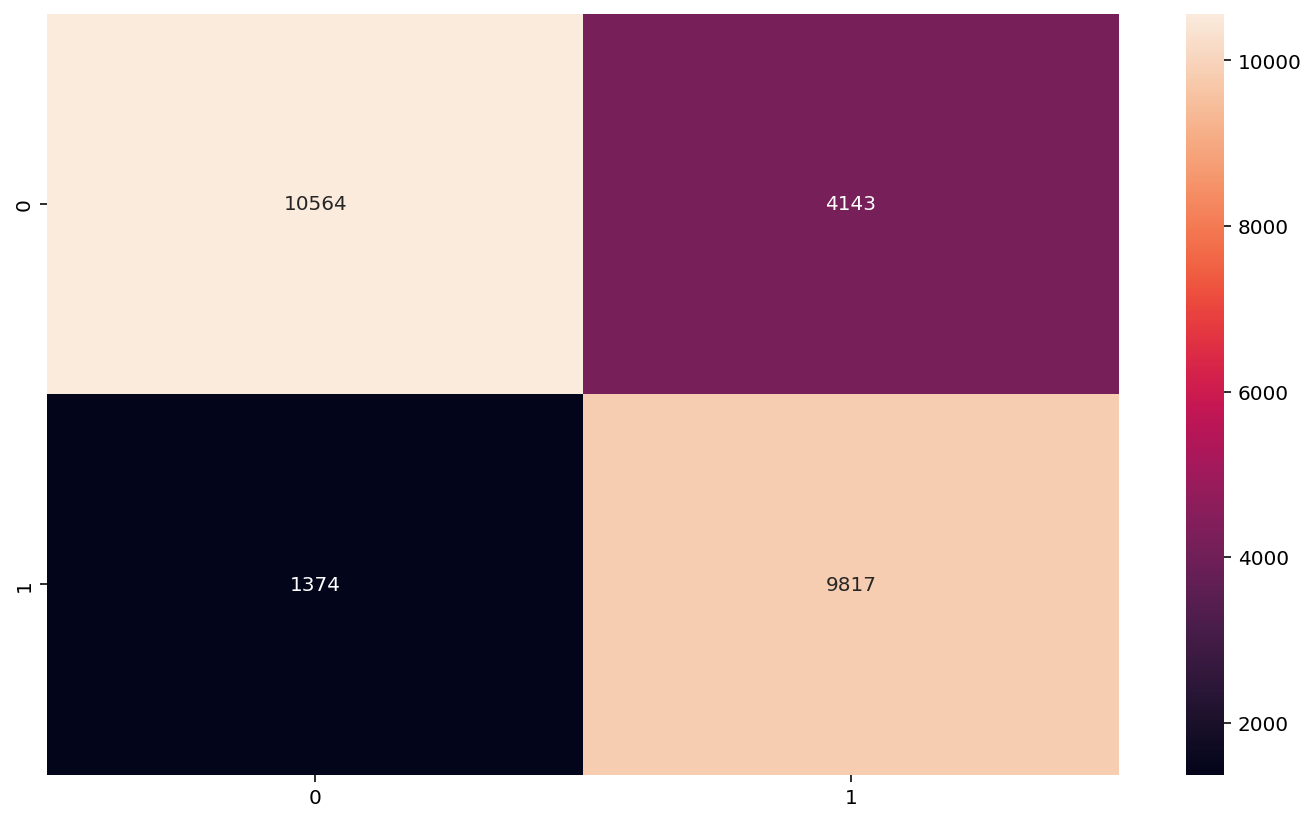

In [20]:
from sklearn.linear_model import SGDClassifier
SGD_model = SGDClassifier(loss="perceptron", penalty="l2", max_iter=10000)

SGD_model.fit(x_train, y_train)

SGD_hat = SGD_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, SGD_hat)
precision = sklearn.metrics.precision_score(y_test, SGD_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, SGD_hat)
f_measure = sklearn.metrics.f1_score(y_test, SGD_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, SGD_hat), annot=True, fmt='g')

R:  0.9263572836409245
P:  0.9694355897243577
A:  0.9556722526836049
F:  0.9474070001832509


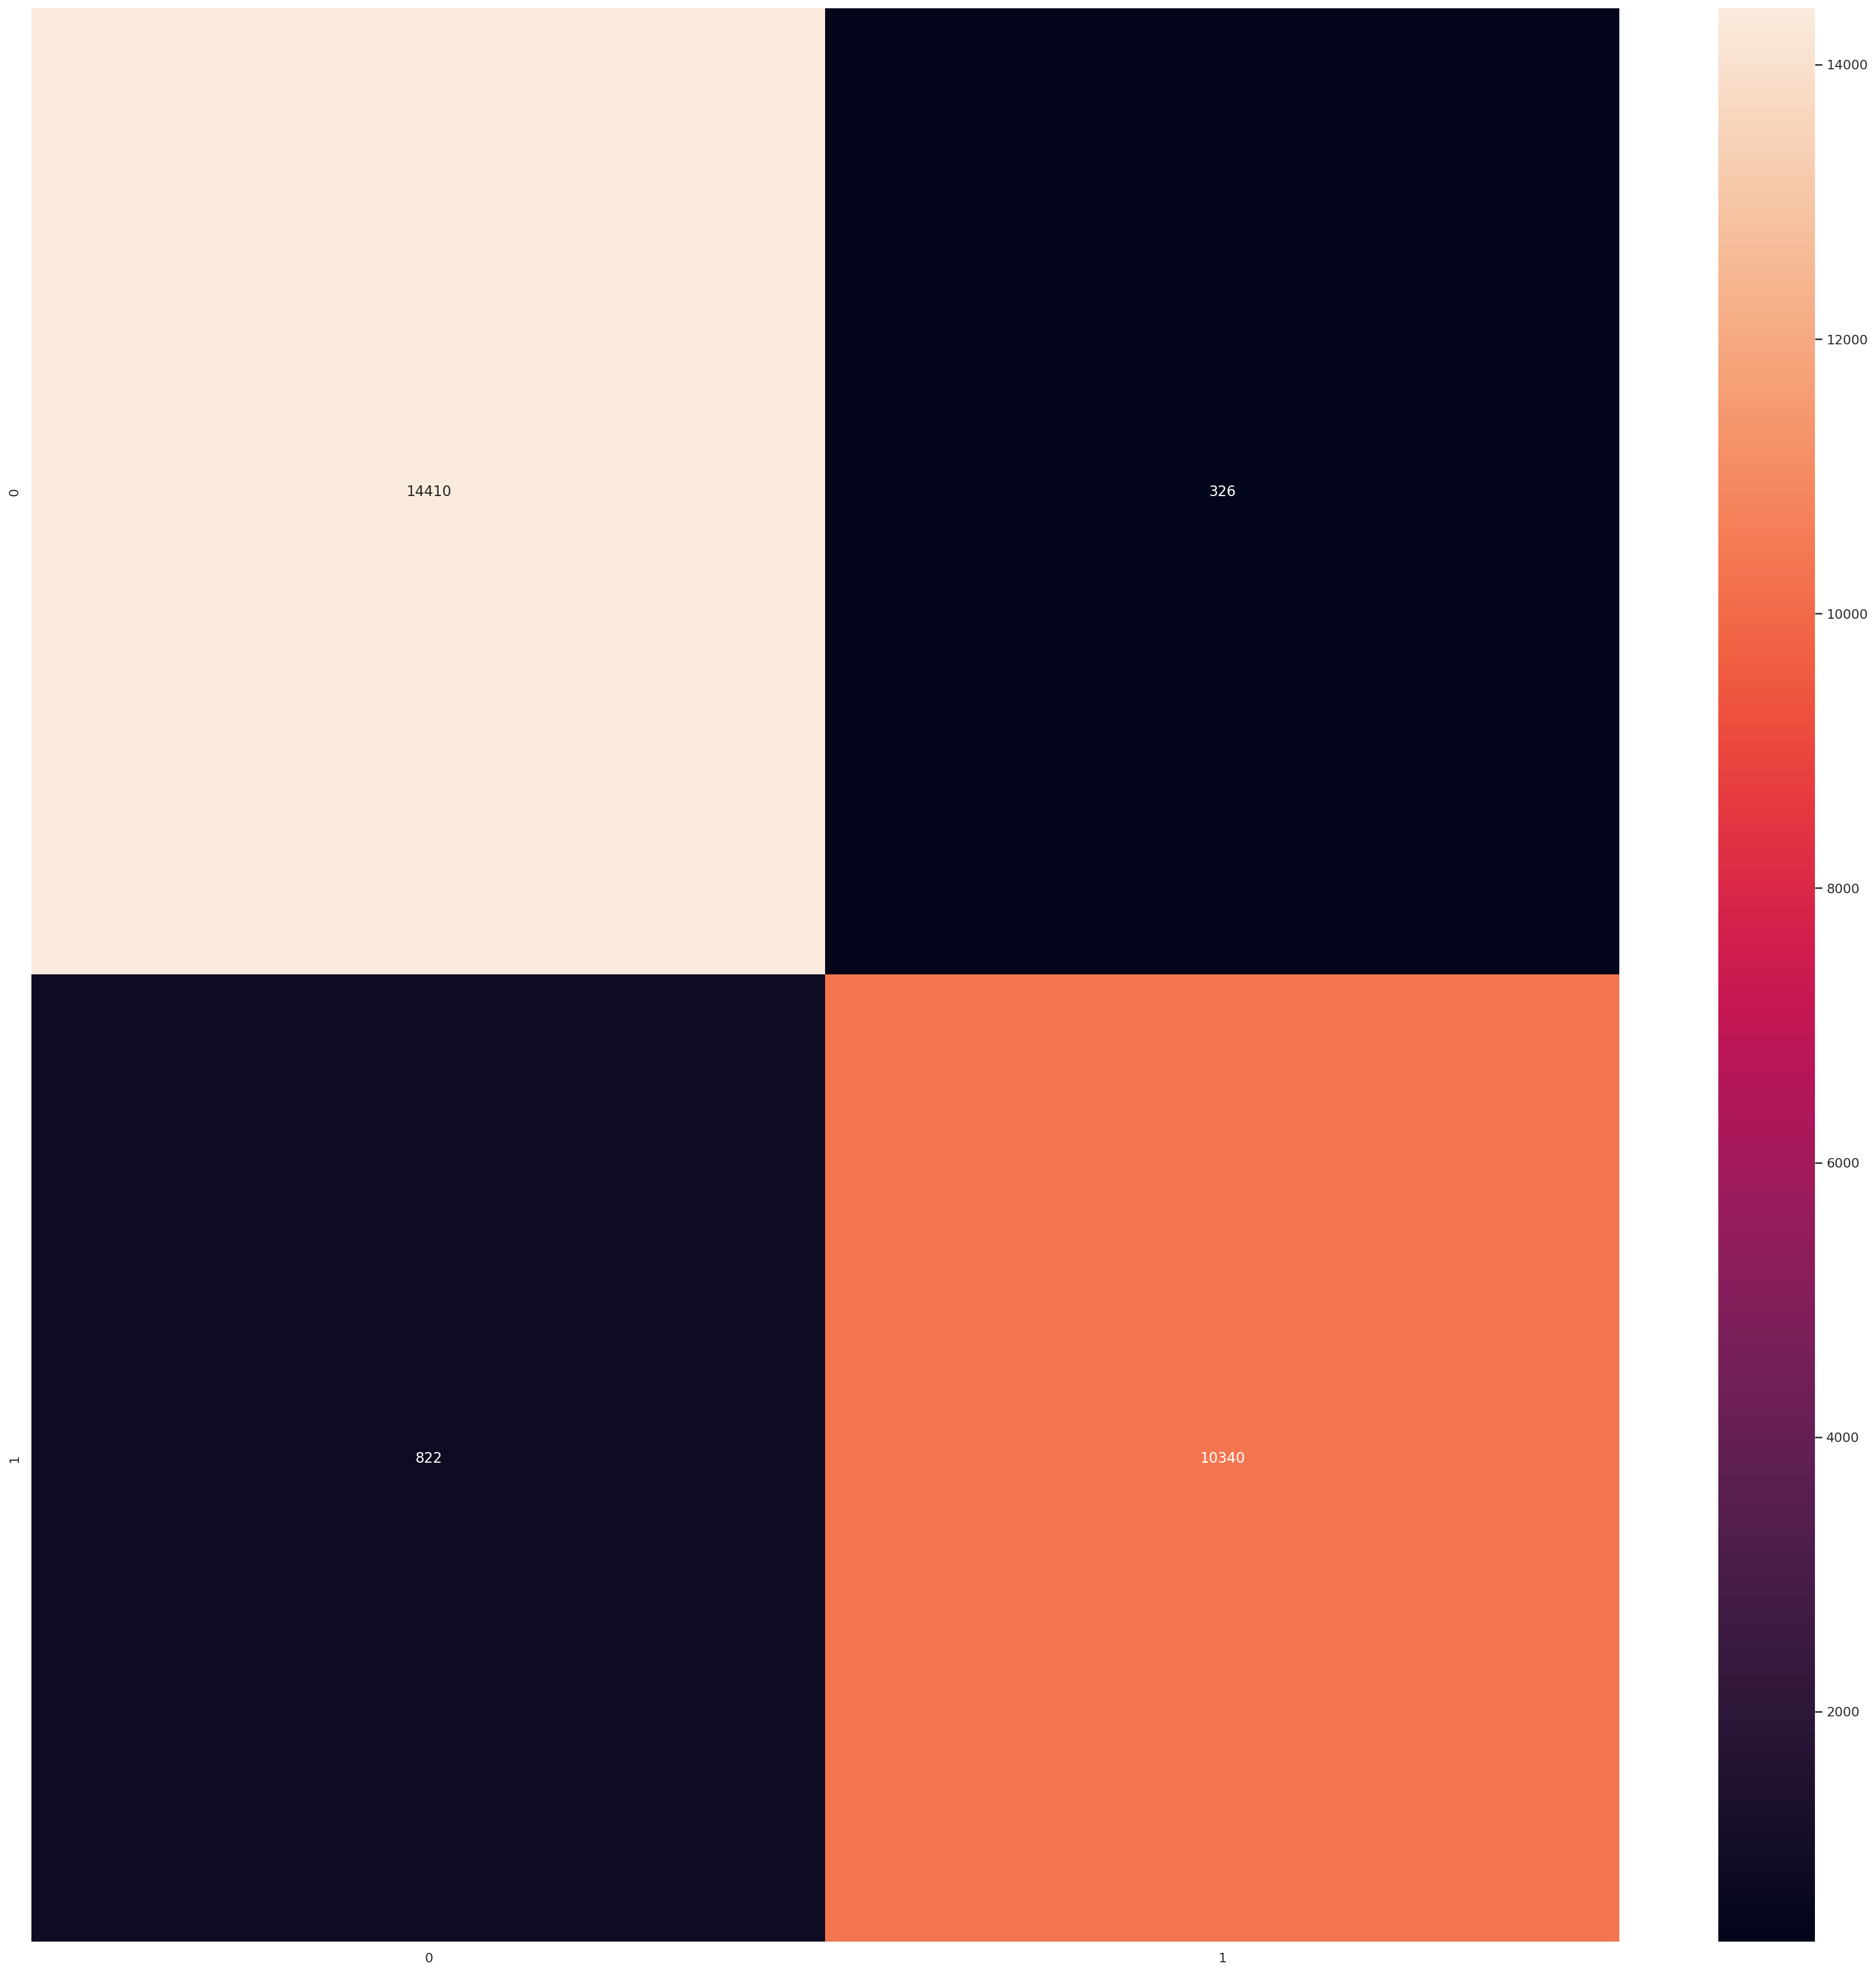

In [10]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=10)

RF_model.fit(x_train, y_train)

RF_hat = RF_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, RF_hat)
precision = sklearn.metrics.precision_score(y_test, RF_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, RF_hat)
f_measure = sklearn.metrics.f1_score(y_test, RF_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, RF_hat), annot=True, fmt='g')

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


R:  0.42779071850922773
P:  0.6828256828256828
A:  0.667734960228589
F:  0.5260258881850729


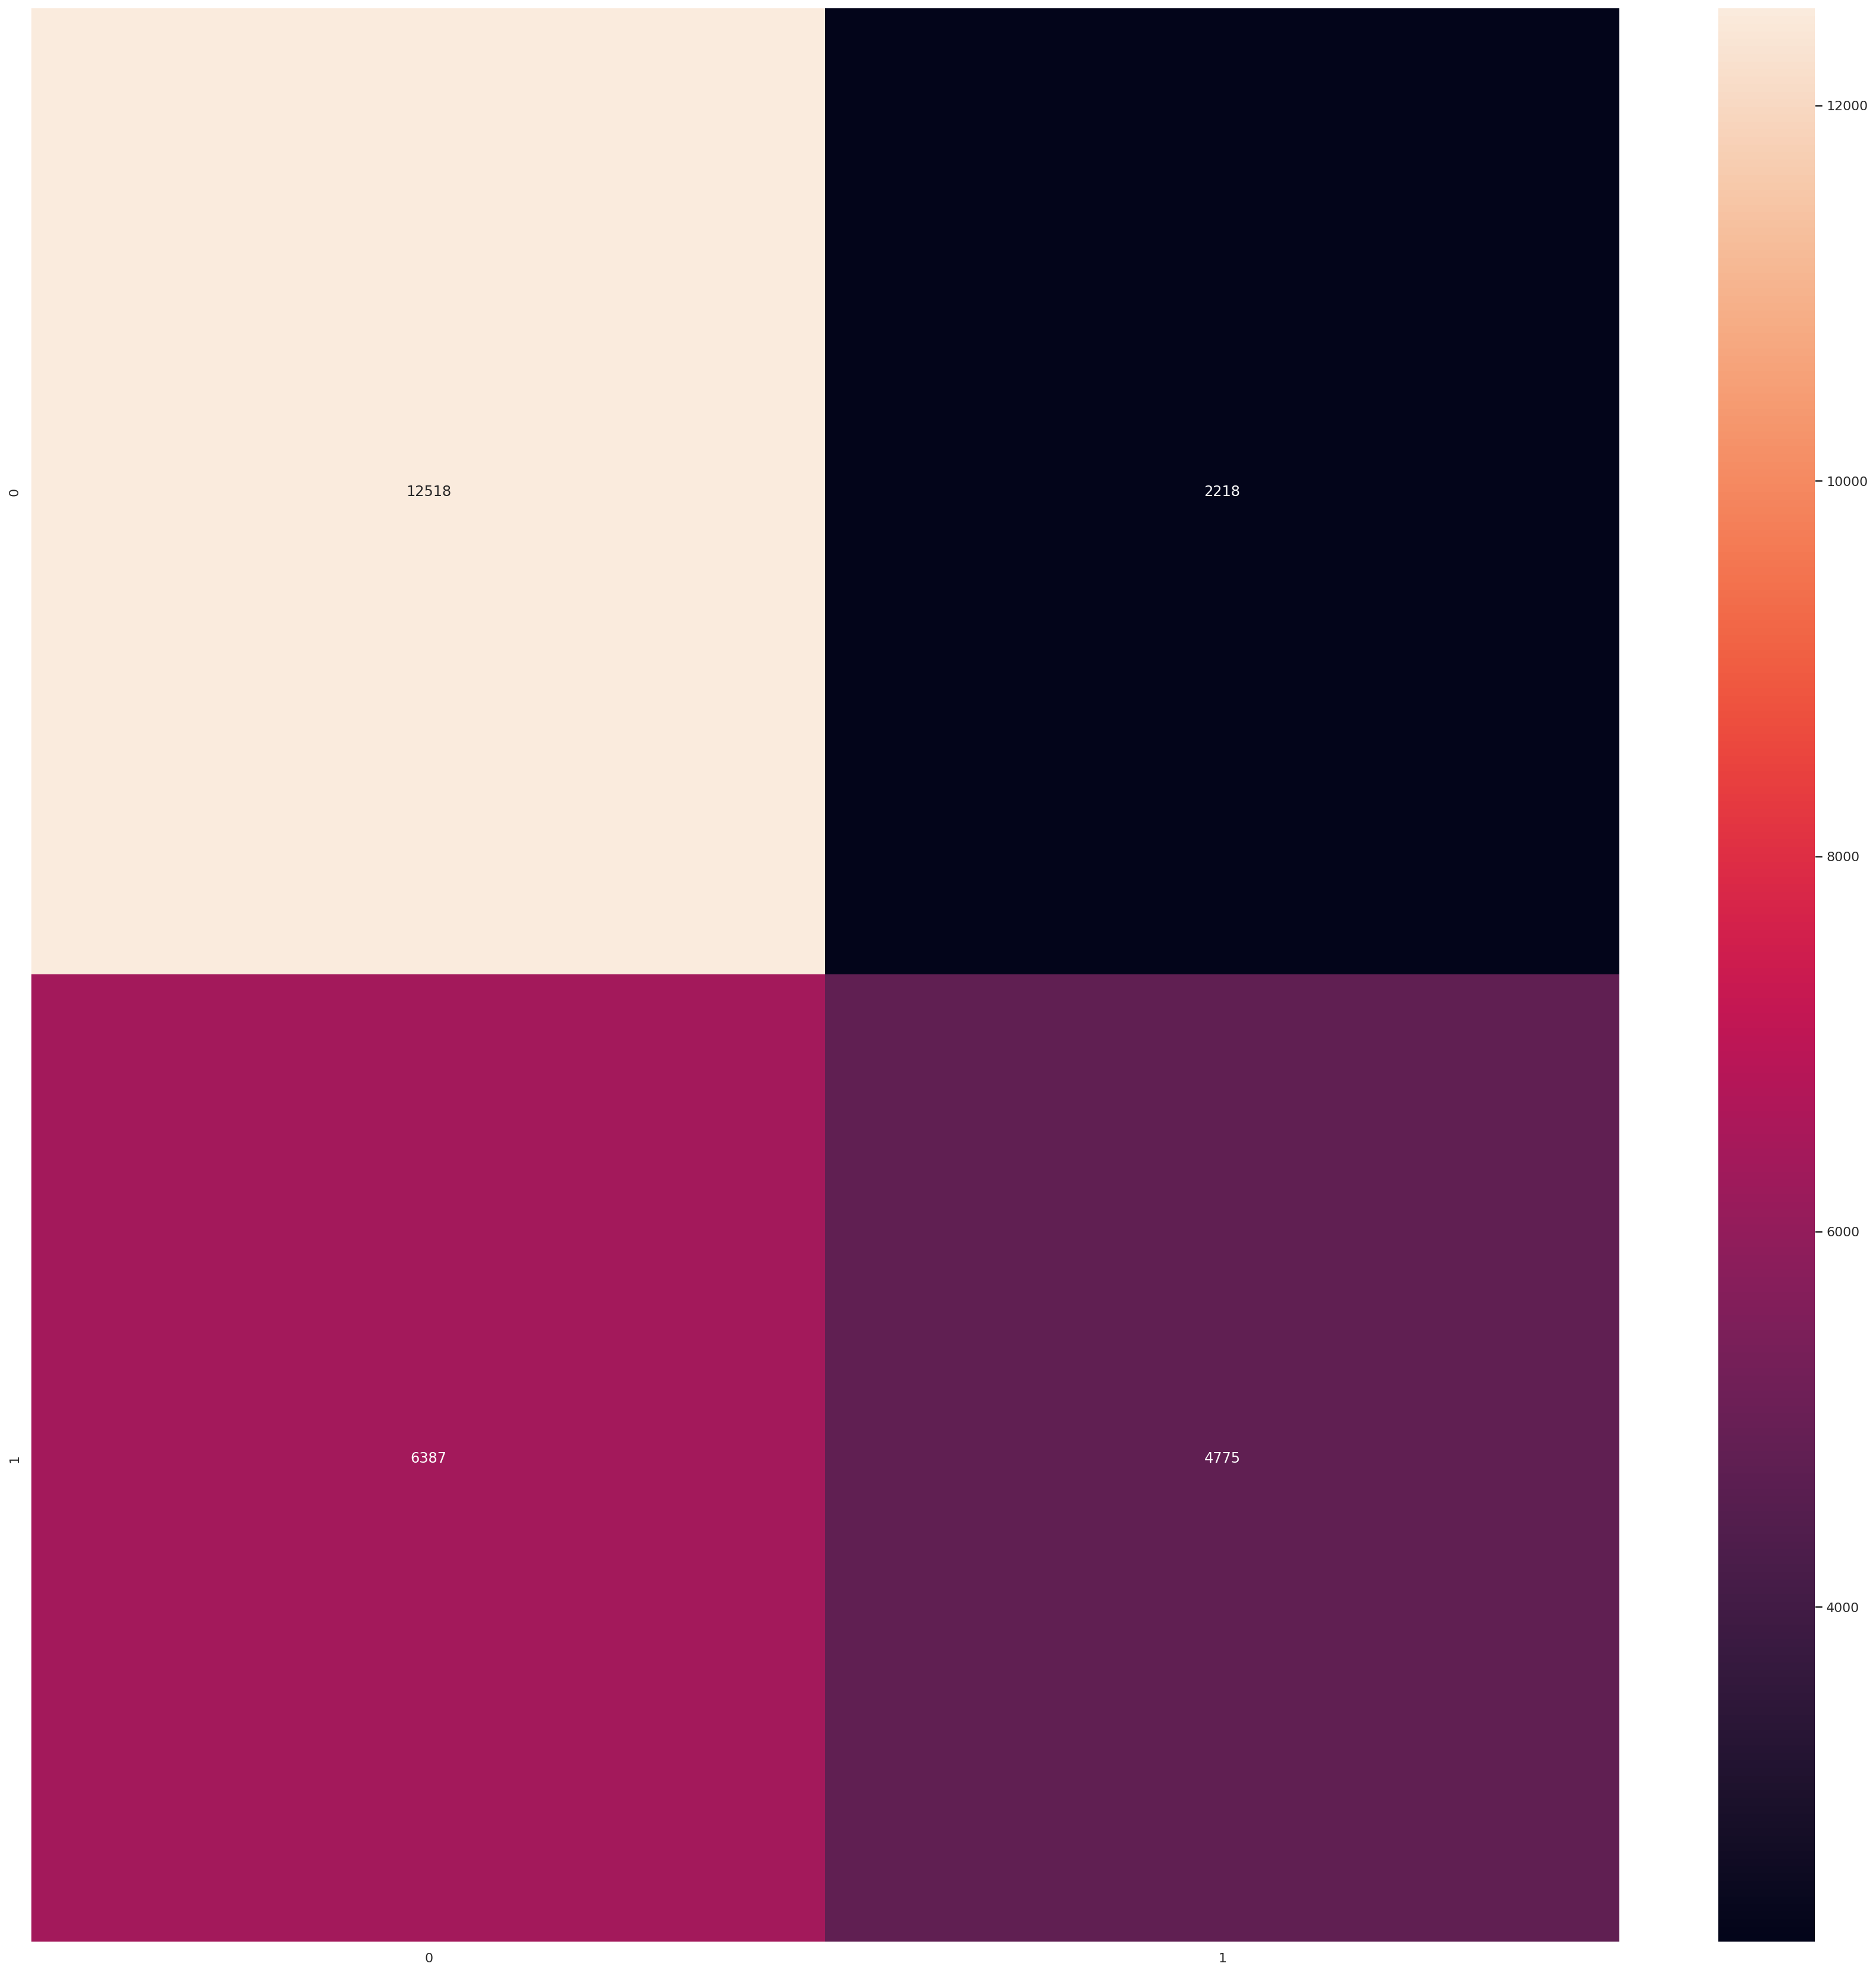

In [22]:
from sklearn.neural_network import MLPClassifier
Neural_model = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=(10, 10), random_state=1)

Neural_model.fit(x_train, y_train)

Neural_hat = Neural_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test, Neural_hat)
precision = sklearn.metrics.precision_score(y_test, Neural_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, Neural_hat)
f_measure = sklearn.metrics.f1_score(y_test, Neural_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, Neural_hat), annot=True, fmt='g')

R:  0.8740369109478588
P:  0.8846572361262242
A:  0.8965943316086185
F:  0.8793150067598018


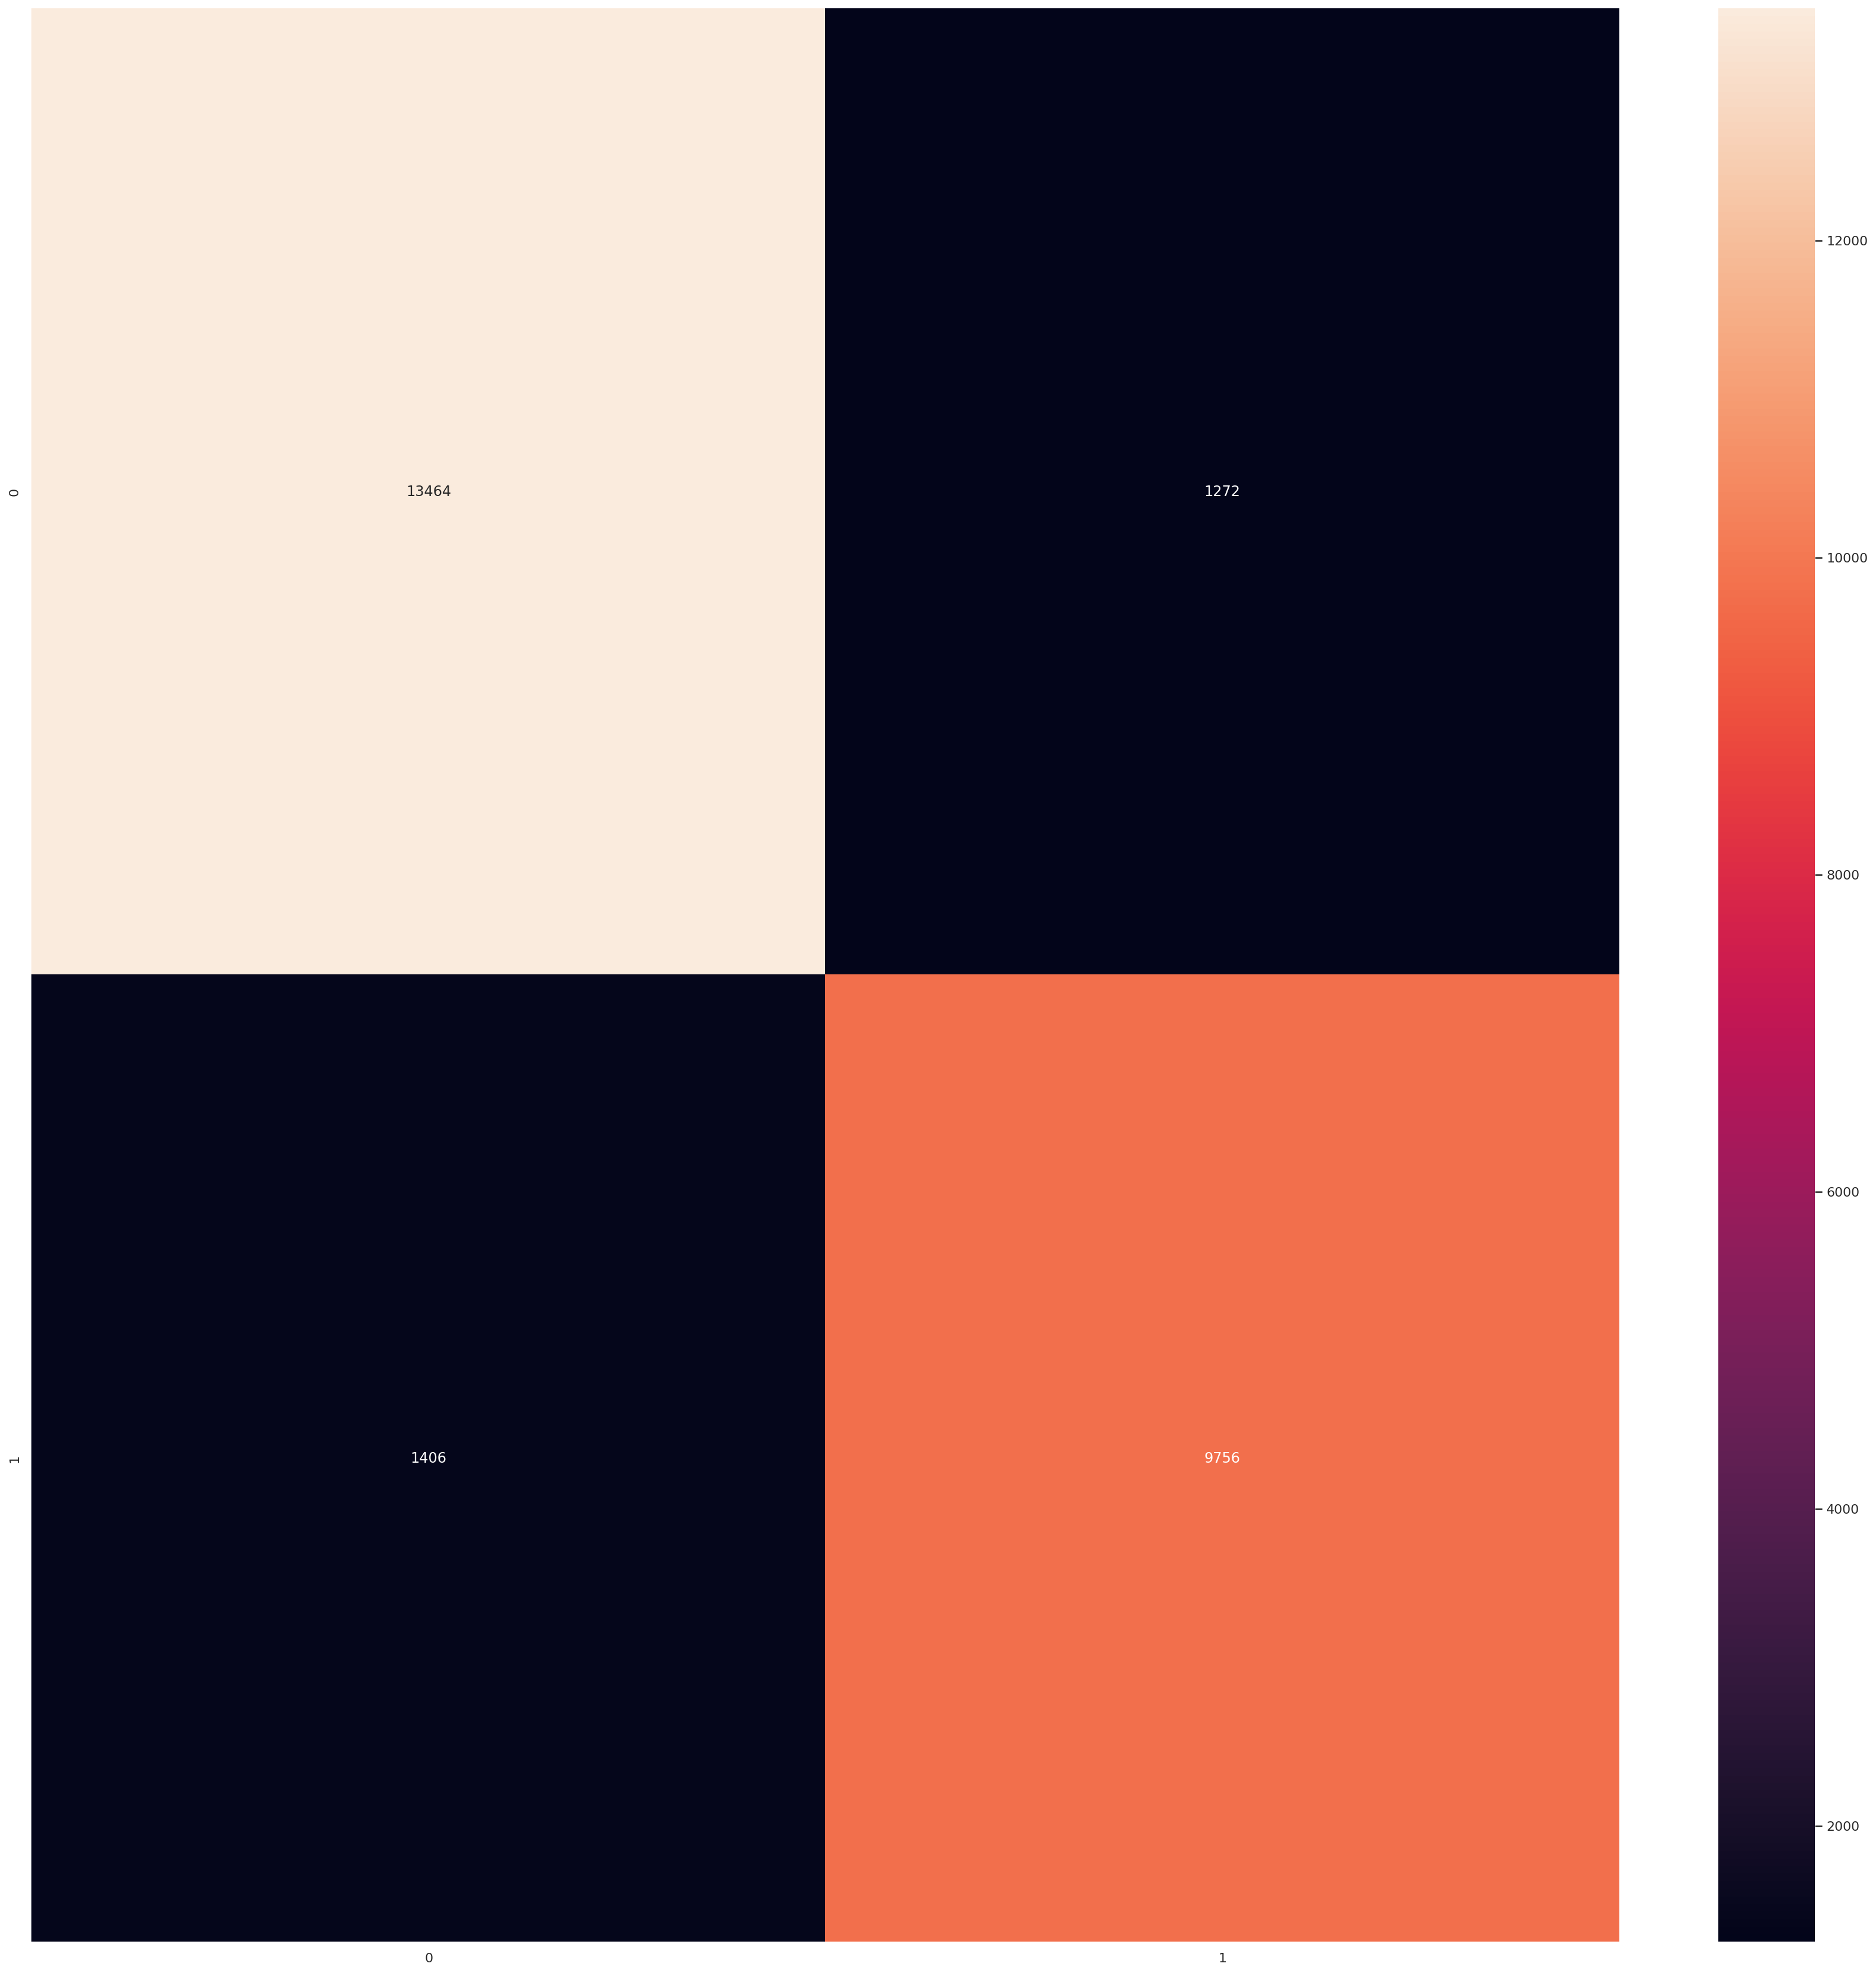

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

NB_model = CategoricalNB()

NB_model.fit(x_train, y_train)

NB_hat = NB_model.predict(x_test)

recall = sklearn.metrics.recall_score(y_test,NB_hat)
precision = sklearn.metrics.precision_score(y_test, NB_hat)
accuracy = sklearn.metrics.accuracy_score(y_test, NB_hat)
f_measure = sklearn.metrics.f1_score(y_test, NB_hat)
print("R: ", recall)
print("P: ", precision)
print("A: ", accuracy)
print("F: ", f_measure)

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, NB_hat), annot=True, fmt='g')